## Autoencoders: Understanding the implementation

### Contents

<ul>
<li>1. Introduction</li>
<ul>
    <li>1.1 What are Autoencoders ? </li>
    <li>1.2 How Autoencoders Work ? </li>
</ul>
<li>2. Implementation and UseCases</li>
<ul>
    <li>2.1 UseCase 1: Image Reconstruction </li>
    <li>2.2 UseCase 2: Noise Removal </li>
    
</ul>
</ul>

<br>
'''


A typical autoencoder architecture comprises of three main components:

- **Encoding Architecture :** The encoder architecture comprises of series of layers with decreasing number of nodes and ultimately reduces to a latent view repersentation.  
- **Latent View Repersentation :** Latent view repersents the lowest level space in which the inputs are reduced and information is preserved.  
- **Decoding Architecture :** The decoding architecture is the mirro image of the encoding architecture but in which number of nodes in every layer increases and ultimately outputs the similar (almost) input.  

![](https://i.imgur.com/Rrmaise.png)

 **Autoencoders use cases are:**

- Dimentionality Reduction   
- Image Compression   
- Image Denoising   
- Image Generation    
- Feature Extraction  






# UseCase 1 : Image Reconstruction

In [ ]:
## load the libraries
from keras.layers import Dense, Input, Conv2D, LSTM, MaxPool2D, UpSampling2D
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from numpy import argmax, array_equal
import matplotlib.pyplot as plt
from keras.models import Model
from imgaug import augmenters
from random import randint
import pandas as pd
import numpy as np

### 2. Dataset Prepration

Load the dataset, separate predictors and target, normalize the inputs.

In [ ]:
### read dataset
train = pd.read_csv("/content/fashion-mnist_train.csv")
train_x = train[list(train.columns)[1:]].values
train_y = train['label'].values

## normalize and reshape the predictors
train_x = train_x / 255

## create train and validation datasets
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2)

## reshape the inputs
train_x = train_x.reshape(-1, 784)
val_x = val_x.reshape(-1, 784)

### 3. Create Autoencoder architecture



In [ ]:
## input layer
input_layer = Input(shape=(784,))

## encoding architecture
encode_layer1 = Dense(1500, activation='relu')(input_layer)
encode_layer2 = Dense(1000, activation='relu')(encode_layer1)
encode_layer3 = Dense(500, activation='relu')(encode_layer2)

## latent view
latent_view   = Dense(10, activation='sigmoid')(encode_layer3)

## decoding architecture
decode_layer1 = Dense(500, activation='relu')(latent_view)
decode_layer2 = Dense(1000, activation='relu')(decode_layer1)
decode_layer3 = Dense(1500, activation='relu')(decode_layer2)

## output layer
output_layer  = Dense(784)(decode_layer3)

model = Model(input_layer, output_layer)

Here is the summary of our autoencoder architecture.

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 1500)              1177500   
                                                                 
 dense_1 (Dense)             (None, 1000)              1501000   
                                                                 
 dense_2 (Dense)             (None, 500)               500500    
                                                                 
 dense_3 (Dense)             (None, 10)                5010      
                                                                 
 dense_4 (Dense)             (None, 500)               5500      
                                                                 
 dense_5 (Dense)             (None, 1000)              501000

Next, we will train the model.

In [ ]:
model.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
model.fit(train_x, train_x, epochs=20, batch_size=2048, validation_data=(val_x, val_x), callbacks=[early_stopping])

Epoch 1/20
24/24 [==============================] - 28s 1s/step - loss: 0.0978 - val_loss: 0.0720
Epoch 2/20
24/24 [==============================] - 24s 999ms/step - loss: 0.0662 - val_loss: 0.0581
Epoch 3/20
24/24 [==============================] - 24s 1s/step - loss: 0.0514 - val_loss: 0.0436
Epoch 4/20
24/24 [==============================] - 24s 1s/step - loss: 0.0411 - val_loss: 0.0386
Epoch 5/20
24/24 [==============================] - 25s 1s/step - loss: 0.0374 - val_loss: 0.0357
Epoch 6/20
24/24 [==============================] - 24s 995ms/step - loss: 0.0346 - val_loss: 0.0321
Epoch 7/20
24/24 [==============================] - 24s 991ms/step - loss: 0.0312 - val_loss: 0.0296
Epoch 8/20
24/24 [==============================] - 24s 1s/step - loss: 0.0285 - val_loss: 0.0275
Epoch 9/20
24/24 [==============================] - 24s 985ms/step - loss: 0.0268 - val_loss: 0.0257
Epoch 10/20
24/24 [==============================] - 24s 1s/step - loss: 0.0254 - val_loss: 0.0247
Epoch 1

Generate the predictions on validation data.

In [ ]:
preds = model.predict(val_x)

375/375 [==============================] - 4s 11ms/step


Lets plot the original and predicted image

**Inputs: Actual Images**

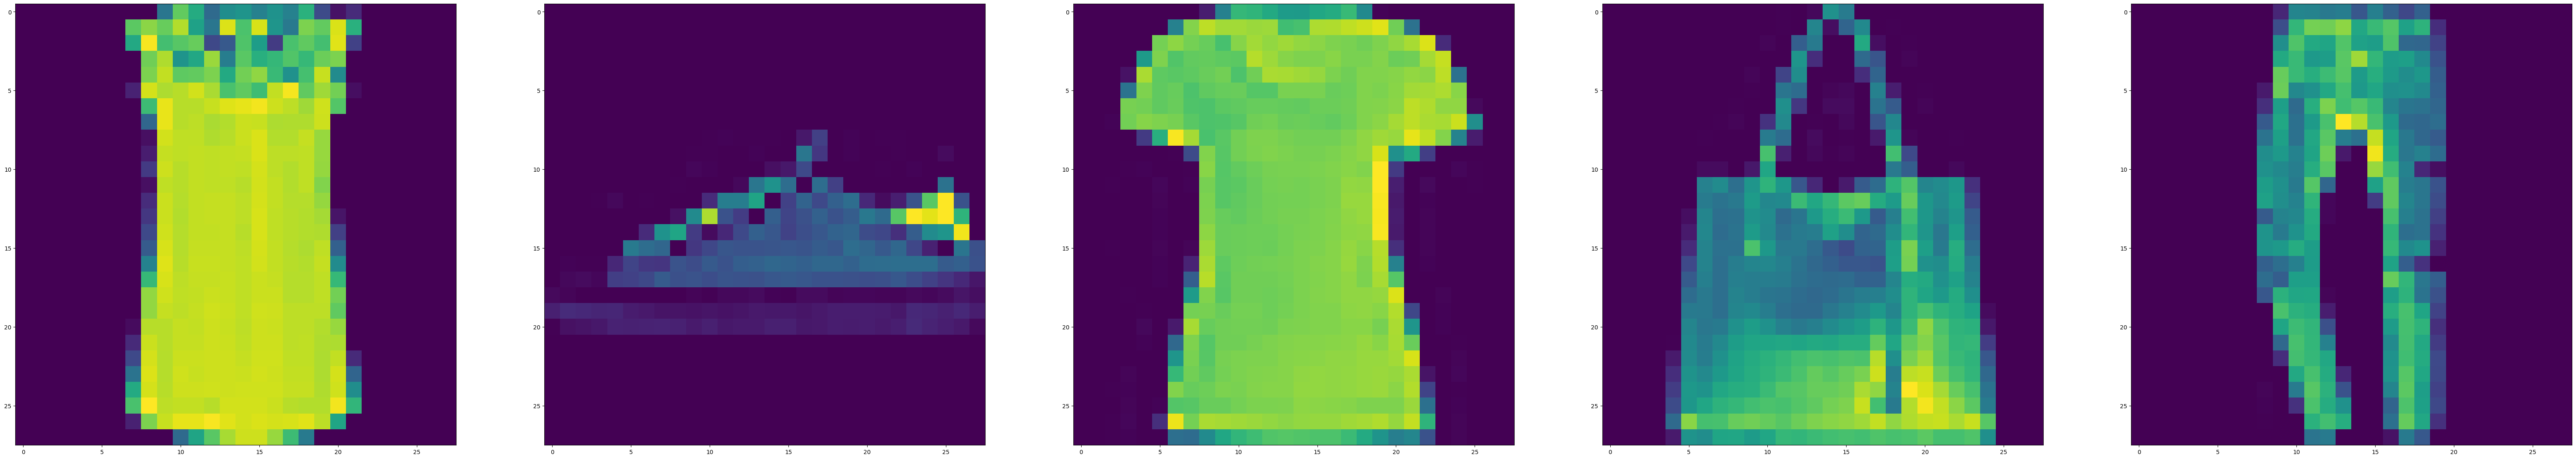

In [ ]:
from PIL import Image
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(val_x[i].reshape(28, 28))
plt.show()

**Predicted : Autoencoder Output**

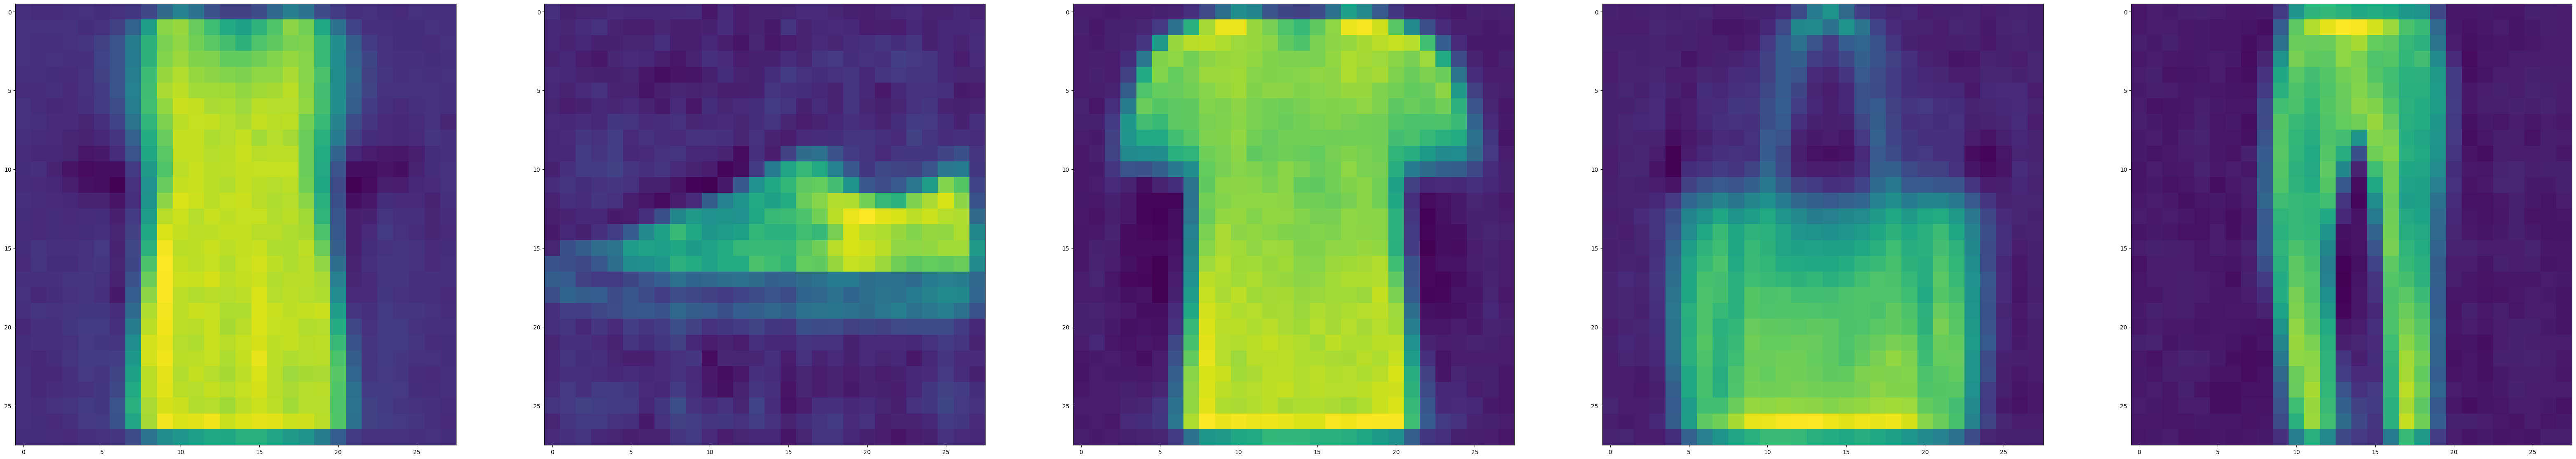

In [ ]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(preds[i].reshape(28, 28))
plt.show()



## 2.2 UseCase 2 - Image Denoising



![](https://www.learnopencv.com/wp-content/uploads/2017/11/denoising-autoencoder-600x299.jpg)

In [ ]:
## recreate the train_x array and val_x array
train_x = train[list(train.columns)[1:]].values
train_x, val_x = train_test_split(train_x, test_size=0.2)

## normalize and reshape
train_x = train_x/255.
val_x = val_x/255.

In this autoencoder network, we will add convolutional layers because convolutional networks works really well with the image inputs. To apply convolutions on image data, we will reshape our inputs in the form of 28 * 28 matrix.  

In [ ]:
train_x = train_x.reshape(-1, 28, 28, 1)
val_x = val_x.reshape(-1, 28, 28, 1)

### Noisy Images

We can intentionally introduce the noise in an image. I am using imaug package which can be used to augment the images with different variations. One such variation can be introduction of noise. Different types of noises can be added to the images. For example:

- Salt and Pepper Noise  
- Gaussian Noise  
- Periodic Noise  
- Speckle Noise  



In [ ]:
# Lets add sample noise - Salt and Pepper
noise = augmenters.SaltAndPepper(0.1)
seq_object = augmenters.Sequential([noise])

train_x_n = seq_object.augment_images(train_x * 255) / 255
val_x_n = seq_object.augment_images(val_x * 255) / 255

Before adding noise

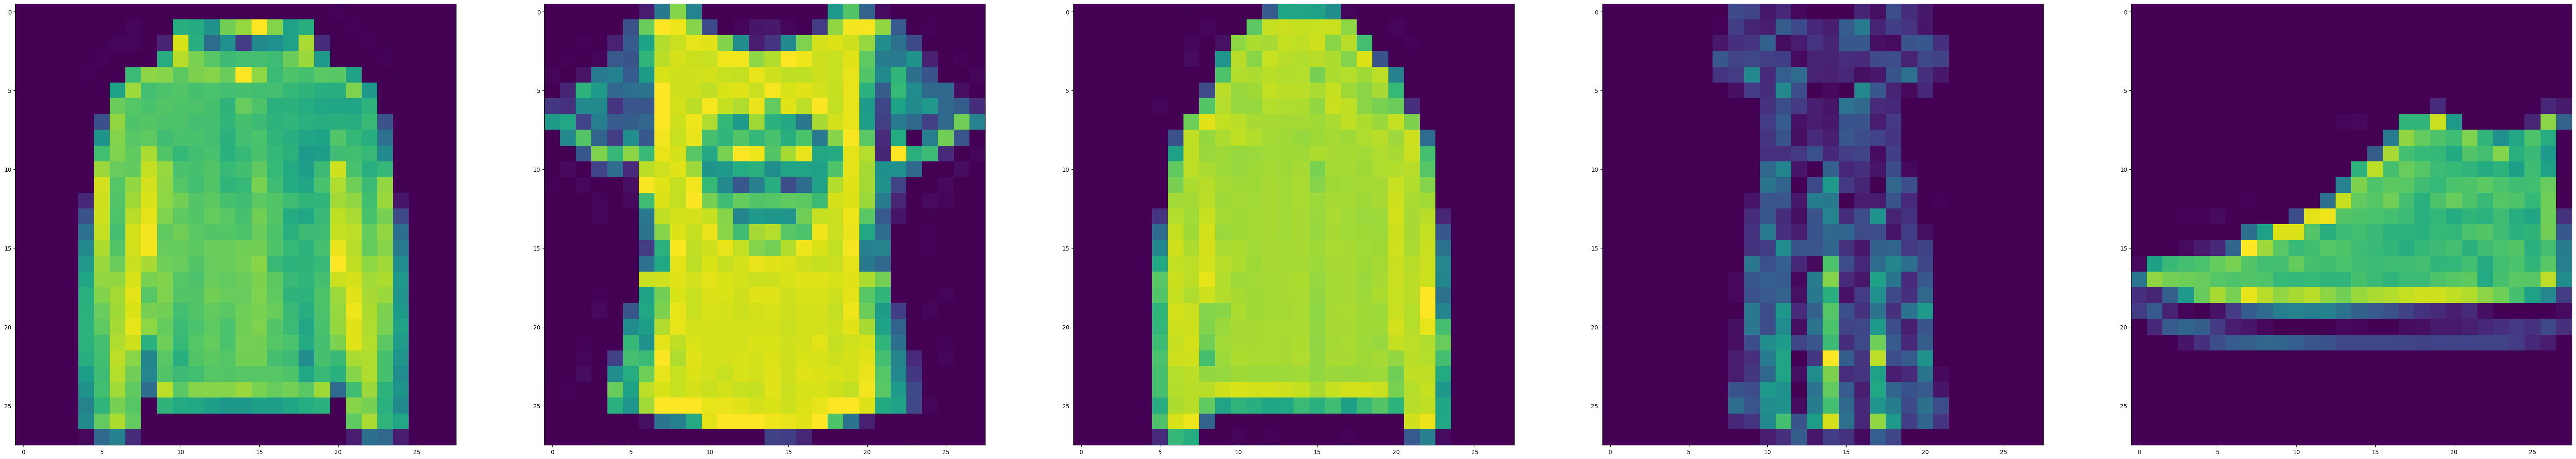

In [ ]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
    ax[i-5].imshow(train_x[i].reshape(28, 28))
plt.show()

After adding noise

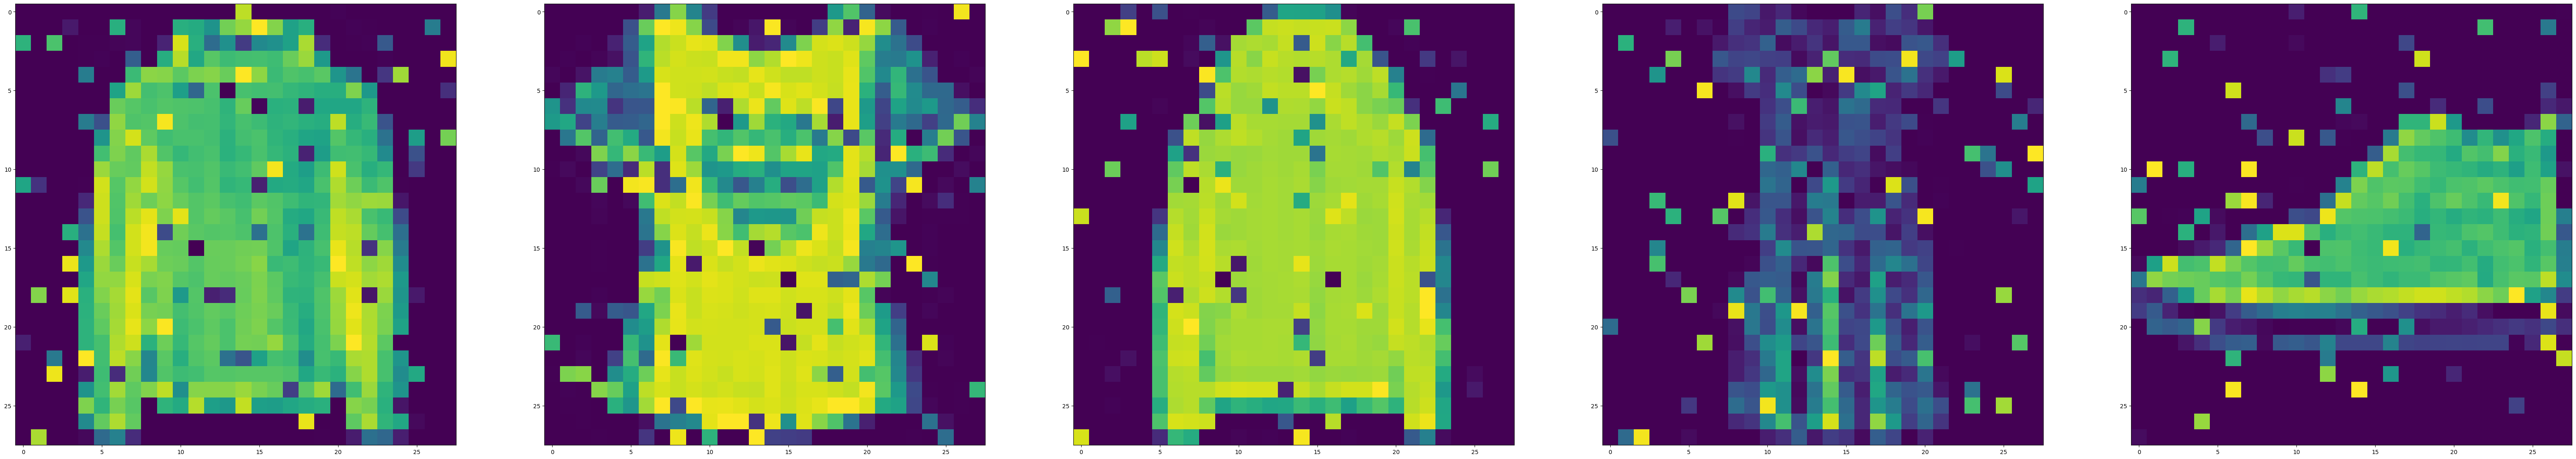

In [ ]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
    ax[i-5].imshow(train_x_n[i].reshape(28, 28))
plt.show()

In [ ]:
# input layer
input_layer = Input(shape=(28, 28, 1))

# encoding architecture
encoded_layer1 = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer) #shape = (28, 28, 64)
encoded_layer1 = MaxPool2D( (2, 2), padding='same')(encoded_layer1) #Shape: (14, 14, 64)
encoded_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded_layer1) #Shape: (14, 14, 32)
encoded_layer2 = MaxPool2D( (2, 2), padding='same')(encoded_layer2) #Shape: (7, 7, 32)
encoded_layer3 = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded_layer2) #Shape: (7, 7, 16)
latent_view    = MaxPool2D( (2, 2), padding='same')(encoded_layer3) #Shape: (4, 4, 16)

# decoding architecture
decoded_layer1 = Conv2D(16, (3, 3), activation='relu', padding='same')(latent_view) #Shape: (4, 4, 16)
decoded_layer1 = UpSampling2D((2, 2))(decoded_layer1)  #Shape: (8, 8, 16) (due to upsampling with a 2x2 size)
decoded_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(decoded_layer1) #Shape: (8, 8, 32)
decoded_layer2 = UpSampling2D((2, 2))(decoded_layer2)  #Shape: (16, 16, 32) (due to upsampling with a 2x2 size)
decoded_layer3 = Conv2D(64, (3, 3), activation='relu')(decoded_layer2) #Shape: (14, 14, 64) (due to the default padding='valid' in Conv2D)
decoded_layer3 = UpSampling2D((2, 2))(decoded_layer3) #Shape: (28, 28, 64) (due to upsampling with a 2x2 size)
output_layer   = Conv2D(1, (3, 3), padding='same')(decoded_layer3) #Shape: (28, 28, 1) (output channels represent the reconstructed image)

# compile the model
model_2 = Model(input_layer, output_layer)
model_2.compile(optimizer='adam', loss='mse')

Here is the model summary

In [ ]:
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 16)          4624

Train the model with early stopping callback. Increase the number of epochs to a higher number for better results.

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=5, mode='auto')
history = model_2.fit(train_x_n, train_x, epochs=10, batch_size=2048, validation_data=(val_x_n, val_x), callbacks=[early_stopping])

Epoch 1/10
24/24 [==============================] - 110s 4s/step - loss: 0.0770 - val_loss: 0.0494
Epoch 2/10
24/24 [==============================] - 107s 4s/step - loss: 0.0419 - val_loss: 0.0360
Epoch 3/10
24/24 [==============================] - 107s 4s/step - loss: 0.0327 - val_loss: 0.0300
Epoch 4/10
24/24 [==============================] - 110s 5s/step - loss: 0.0281 - val_loss: 0.0265
Epoch 5/10
24/24 [==============================] - 111s 5s/step - loss: 0.0252 - val_loss: 0.0242
Epoch 6/10
24/24 [==============================] - 110s 5s/step - loss: 0.0236 - val_loss: 0.0230
Epoch 7/10
24/24 [==============================] - 115s 5s/step - loss: 0.0224 - val_loss: 0.0218
Epoch 8/10
24/24 [==============================] - 112s 5s/step - loss: 0.0214 - val_loss: 0.0220
Epoch 9/10
24/24 [==============================] - 110s 5s/step - loss: 0.0208 - val_loss: 0.0203
Epoch 10/10
24/24 [==============================] - 108s 5s/step - loss: 0.0199 - val_loss: 0.0196


Lets obtain the predictions of the model

1/1 [==============================] - 0s 98ms/step


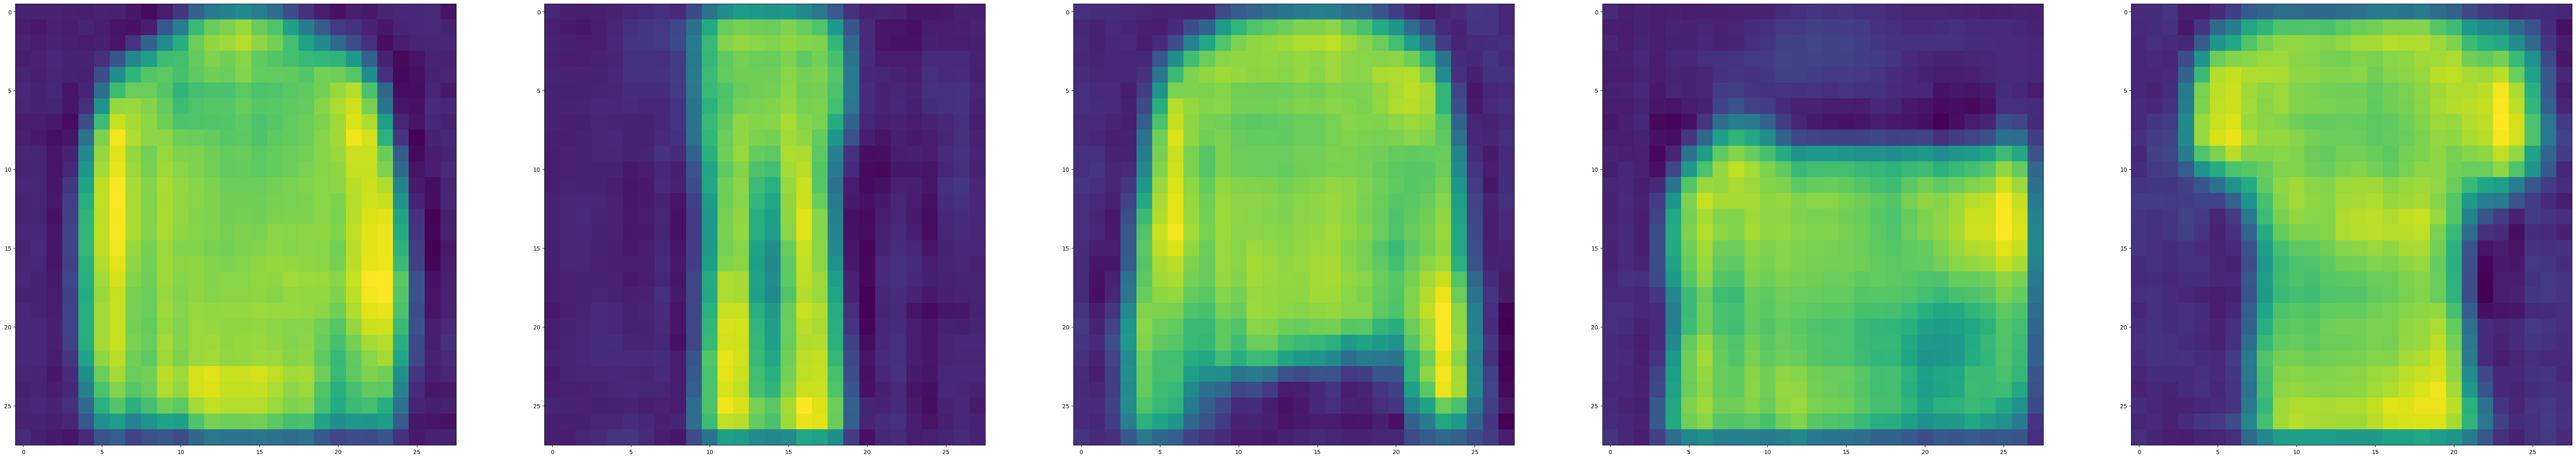

In [ ]:
preds = model_2.predict(val_x_n[:10])
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
    ax[i-5].imshow(preds[i].reshape(28, 28))
plt.show()